In [3]:
import sys, os

onedrive = r"C:\Users\mikek\OneDrive"
sys.path.append(r'C:\Users\mikek\OneDrive\Project\python-packages')
sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))


import xhermes
import numpy as np
import matplotlib.pyplot as plt

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *


%load_ext autoreload
%autoreload 2

C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\boutdataset.py:38: AccessorRegistrationWarning: registration of accessor <class 'xbout.boutdataset.BoutDatasetAccessor'> under name 'bout' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  class BoutDatasetAccessor:
C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\boutdataarray.py:26: AccessorRegistrationWarning: registration of accessor <class 'xbout.boutdataarray.BoutDataArrayAccessor'> under name 'bout' for type <class 'xarray.core.dataarray.DataArray'> is overriding a preexisting attribute with the same name.
  class BoutDataArrayAccessor:


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
db = CaseDB()
case = Load.case_2D(db.casepaths["x-b3-neut_p_n_free_bc"], gridfilepath = db.gridpaths["g3b1-lores_newhypno.nc"], double_load = False, keep_boundaries = True)

--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.348E+08 [m3]


In [9]:
%matplotlib widget

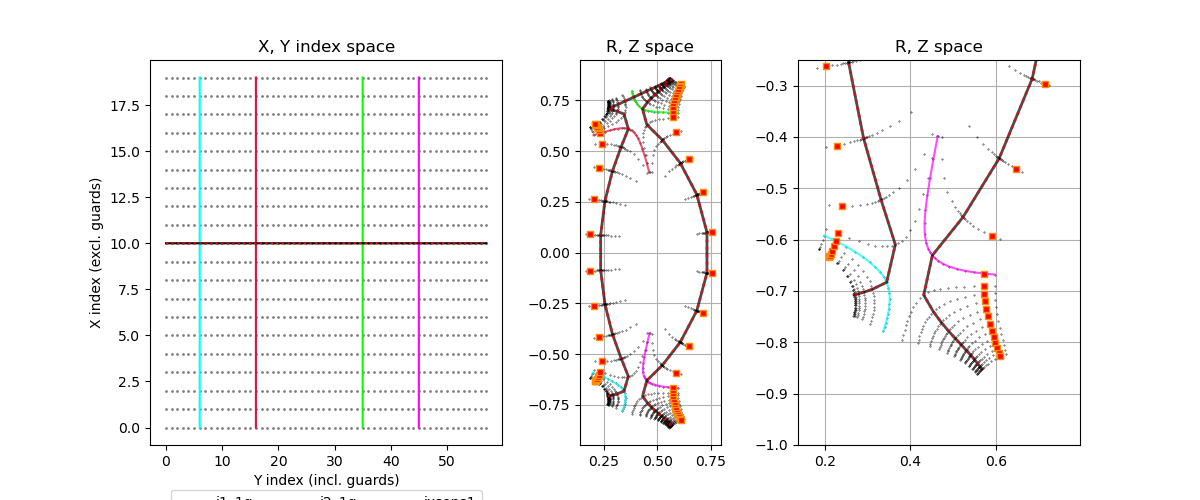

In [15]:
ds = case.ds.copy()
# ds = ds.isel(t=-1)


sel = ds[{"x":-2}]

plot_selection(case, sel)

In [41]:
# param = ""
# d = ds[param]
param = "Ne"
for param in ["Ne"]:
    d = ds[param]
    if any([x in param for x in ["cx", "rec", "iz", "src"]]):
        # Set guards to nan if they are not used.
        # They are not used for any sources/channels
        d[{"x": 1}] = np.nan
        d[{"x": -2}] = np.nan

    # For other variables, the guards may be used. In this case, guard replace
    else:
        
        # d[{"x": 1}] = (d[{"x": 1}] + d[{"x": 2}]) / 2
        d[{"x": 1}] = d[{"x" : slice(1,2)}].mean()
        # d[{"x": -2}] = (d[{"x": -2}] + d[{"x": -3}]) / 2

        # Currently nothing uses the outer guard cells, so set them to nan
        d[{"x": 0}] = np.nan
        d[{"x": -1}] = np.nan


In [49]:
d[{"x" : 0}].values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [34]:
def guard_replace(x):
    x[0] = np.nan
    
    return x
    # da[{"x": 1}] = (da[{"x": 1}] + da[{"x": 2}]) / 2
    # da[{"x": -2}] = (da[{"x": -2}] + da[{"x": -3}]) / 2

In [39]:
import xarray as xr
xr.apply_ufunc(guard_replace, ds["Ne"], "x", dask = "allowed")

TypeError: guard_replace() takes 1 positional argument but 2 were given

In [24]:
for key in ds.data_vars:
    print(key)

Bxy
Dnnd
Ed+_iz
Ed+_rec
Edd+_cx
Fd+_iz
Fd+_rec
Fdd+_cx
G1
G2
G3
J
NVd
NVd+
Nd
Nd+
Ne
Pd
Pd+
Pd+_src
Pd_src
Pe
Pe_src
Rd+_ex
Rd+_rec
SNVd
SNVd+
SNd
SNd+
SPd
SPd+
SPe
Sd+_iz
Sd+_rec
Sd+_src
Sd_src
Td
Td+
Te
Vd+
Ve
anomalous_Chi_d+
anomalous_Chi_e
anomalous_D_d+
anomalous_D_e
anomalous_nu_d+
anomalous_nu_e
cvode_last_order
cvode_last_step
cvode_nfevals
cvode_nliters
cvode_nniters
cvode_nonlin_fails
cvode_npevals
cvode_nsteps
cvode_num_fails
cvode_stab_lims
ddt(NVd)
ddt(NVd+)
ddt(Nd)
ddt(Nd+)
ddt(Pd)
ddt(Pd+)
ddt(Pe)
g11
g12
g13
g22
g23
g33
g_11
g_12
g_13
g_22
g_23
g_33
kappa_par_d+
kappa_par_e
t_array
ncalls
ncalls_e
ncalls_i
Bpxy
Brxy
Bzxy
dr
hthe
dl
dv


In [17]:
ds["Ne"].isel(t=-1, theta = 5).values

array([0.00000000e+00, 7.85460814e+18, 7.85460814e+18, 8.42403070e+18,
       9.53667296e+18, 1.11573038e+19, 1.32143685e+19, 1.57916756e+19,
       1.78220237e+19, 1.85929769e+19, 1.63389871e+19, 1.53561627e+19,
       1.52648812e+19, 1.43905654e+19, 1.22134475e+19, 8.70029906e+18,
       5.56194849e+18, 3.48067830e+18, 3.48067830e+18, 0.00000000e+00])

In [23]:
self = case

param = "NVd+"

MYG = self.MYG
MXG = self.MXG
ny_inner = self.ny_inner

guards = {
    "inner_lower" : dict(last = ) 
}

data = self.ds[param]
# [t, x, y]
data[{"theta":1}] = (data[{"theta":2}] + data[{"theta":1}])/2

In [24]:
self.ds["NVd+"][dict(t = -1, x = 5)].values

array([ 0.00000000e+00, -7.70935275e-07, -4.41784795e-07, -5.61420128e-07,
       -6.53681064e-07, -6.74160030e-07, -6.28635128e-07, -5.53358631e-07,
       -4.75623808e-07, -4.07150555e-07, -3.49046178e-07, -2.98126852e-07,
       -5.15099512e-06, -4.34046601e-06, -3.42566997e-06, -2.37316503e-06,
       -1.25030913e-06, -2.16305115e-07,  5.25087417e-07,  7.97876391e-07,
        6.52122118e-07,  2.66894257e-07, -2.09869944e-07, -5.97488855e-07,
       -7.45497531e-07, -4.78622826e-07,  2.50377915e-07,  1.27110148e-06,
        2.38428425e-06,  3.43261002e-06,  4.34813022e-06,  5.16235640e-06,
        3.34991568e-07,  3.88942266e-07,  4.50373238e-07,  5.22636716e-07,
        6.04552088e-07,  6.83707112e-07,  7.31205641e-07,  7.08627715e-07,
        6.09855866e-07,  4.81824334e-07,  1.17602500e-06,  0.00000000e+00,
        0.00000000e+00, -1.49828593e-06, -5.57593886e-07, -7.21294438e-07,
       -8.45561085e-07, -8.62012942e-07, -7.83397016e-07, -6.71044033e-07,
       -5.61254467e-07, -

In [20]:
# self.ds["NVd+"].isel(t=-1, x = 5).values
self.ds["NVd+"][dict(t = -1, x = 5)].values

array([ 0.00000000e+00, -1.10008575e-06, -4.41784795e-07, -5.61420128e-07,
       -6.53681064e-07, -6.74160030e-07, -6.28635128e-07, -5.53358631e-07,
       -4.75623808e-07, -4.07150555e-07, -3.49046178e-07, -2.98126852e-07,
       -5.15099512e-06, -4.34046601e-06, -3.42566997e-06, -2.37316503e-06,
       -1.25030913e-06, -2.16305115e-07,  5.25087417e-07,  7.97876391e-07,
        6.52122118e-07,  2.66894257e-07, -2.09869944e-07, -5.97488855e-07,
       -7.45497531e-07, -4.78622826e-07,  2.50377915e-07,  1.27110148e-06,
        2.38428425e-06,  3.43261002e-06,  4.34813022e-06,  5.16235640e-06,
        3.34991568e-07,  3.88942266e-07,  4.50373238e-07,  5.22636716e-07,
        6.04552088e-07,  6.83707112e-07,  7.31205641e-07,  7.08627715e-07,
        6.09855866e-07,  4.81824334e-07,  1.17602500e-06,  0.00000000e+00,
        0.00000000e+00, -1.49828593e-06, -5.57593886e-07, -7.21294438e-07,
       -8.45561085e-07, -8.62012942e-07, -7.83397016e-07, -6.71044033e-07,
       -5.61254467e-07, -

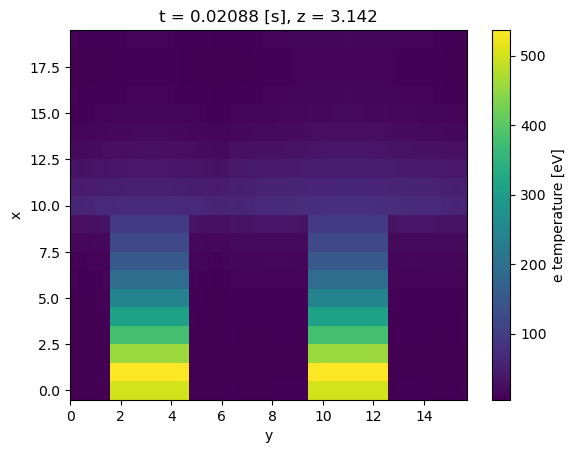

In [23]:
ds["Te"].isel(t=-1).squeeze().plot()